In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('medical.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df['overweight'] = (df['weight']*10000/(df['height']*df['height'])>25).astype(int)
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int32

In [5]:
df['gluc'] = (df['gluc']!=1).astype(int)
df['gluc']

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc, Length: 70000, dtype: int32

In [6]:
# Filter out incorrect data
cleaned_data = df[
    (df['ap_lo'] <= df['ap_hi']) &  # diastolic pressure is not higher than systolic
    (df['height'] >= df['height'].quantile(0.025)) &  # height is within the 2.5th - 97.5th percentile range
    (df['height'] <= df['height'].quantile(0.975)) &  
    (df['weight'] >= df['weight'].quantile(0.025)) &  # weight is within the 2.5th - 97.5th percentile range
    (df['weight'] <= df['weight'].quantile(0.975))
]


In [7]:
cleaned_data

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,1,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,1,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,1,0,0,0,1,1


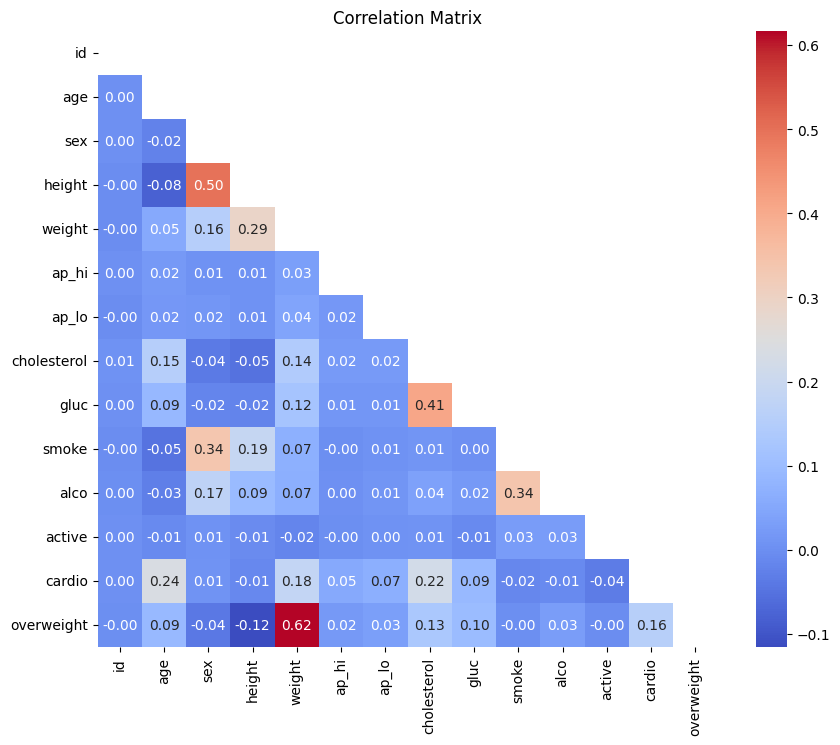

In [8]:
# Create correlation matrix
corr_matrix = df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
heatmap.set_title('Correlation Matrix')

# Show the plot
plt.show()